# MNIST Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import sys
import os
import importlib

sys.path.insert(1, os.path.realpath(os.path.pardir))

import mnist as mnist
import utils as utils

importlib.reload(utils);
importlib.reload(mnist);

In [2]:
X_train, X_test, y_train, y_test = mnist.load_data()
X = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))

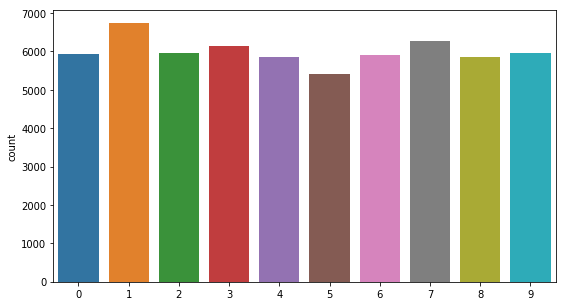

In [3]:
fig, ax = plt.subplots(figsize=(9, 5))
sns.countplot(x=y_train, ax=ax)

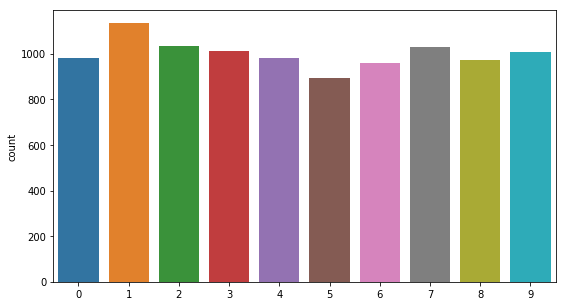

In [4]:
fig, ax = plt.subplots(figsize=(9, 5))
sns.countplot(x=y_test, ax=ax)

In [5]:
def get_digits(X, y, filter_labels, img_pr_label=10):
    final_list = None
    for label in filter_labels:
        filtered = X_train[y_train==label]
        rnd_indices = np.random.choice(filtered.shape[0], img_pr_label)
        filtered = filtered[rnd_indices]
        if final_list is None:
            final_list = filtered
        else:
            final_list = np.concatenate([final_list, filtered], axis=0)
    return final_list

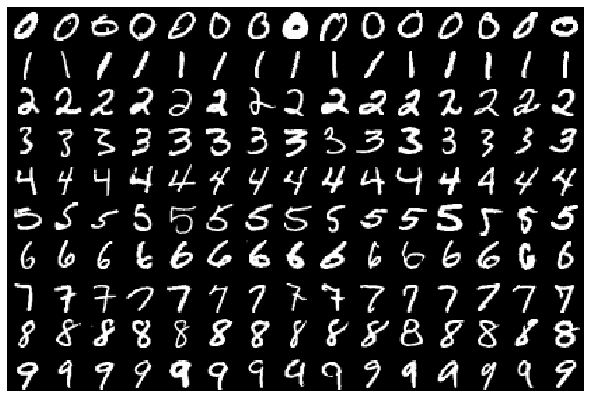

In [6]:
digits = get_digits(X_train, y_train, np.unique(y_train), img_pr_label=15)
fig, axes = utils.plot_images(digits, image_shape=(28, 28), image_transposed=False, n_rows=10, n_columns=15)

In [7]:
fig.savefig('mnist-sample-digits.png')

In [8]:
def plot_2d(data, labels, image_path=None):
    fig, ax = plt.subplots(figsize=(17, 12))

    x1_coords = data.T[0]
    x2_coords = data.T[1]

    for label in np.unique(labels):
        ix = np.where(y_train == label)
        ax.scatter(x1_coords[ix], x2_coords[ix], label=label)
    ax.legend()
    if image_path is not None:
        fig.savefig(image_path, format='svg', dpi=1200)

In [9]:
from sklearn.decomposition import PCA

In [10]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

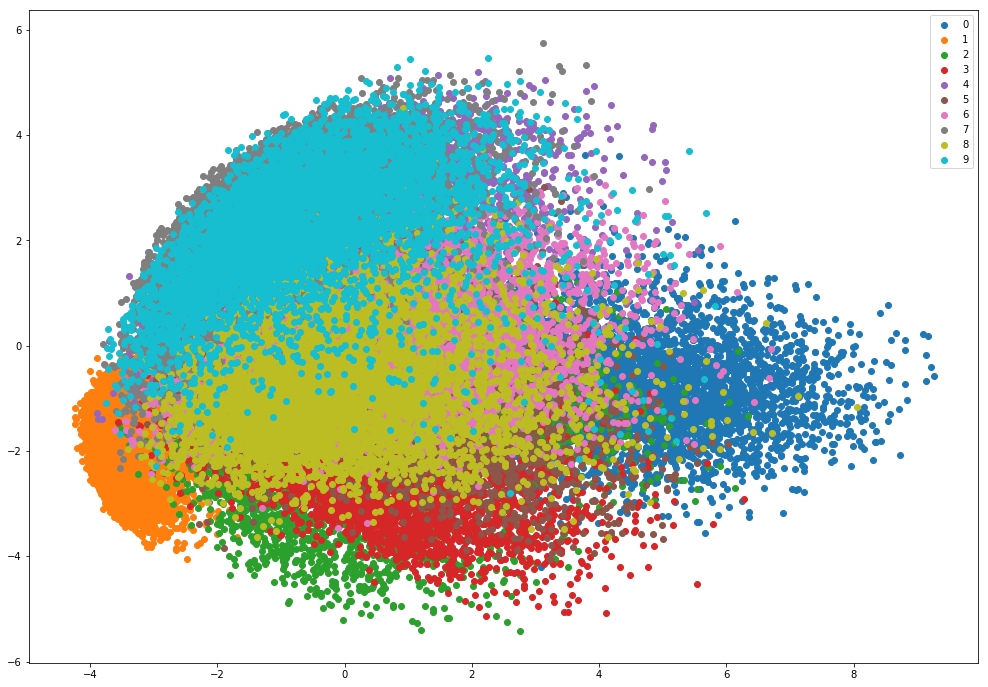

In [11]:
plot_2d(X_train_pca, y_train)

In [14]:
from sklearn.manifold import TSNE

# Reduce 50 dimensions first, otherwise tSNE computation will take too long
X_train_pca_50 = PCA(n_components=50).fit_transform(X_train)

In [15]:
X_train_tsne = TSNE(n_components=2).fit_transform(X_train_pca_50)

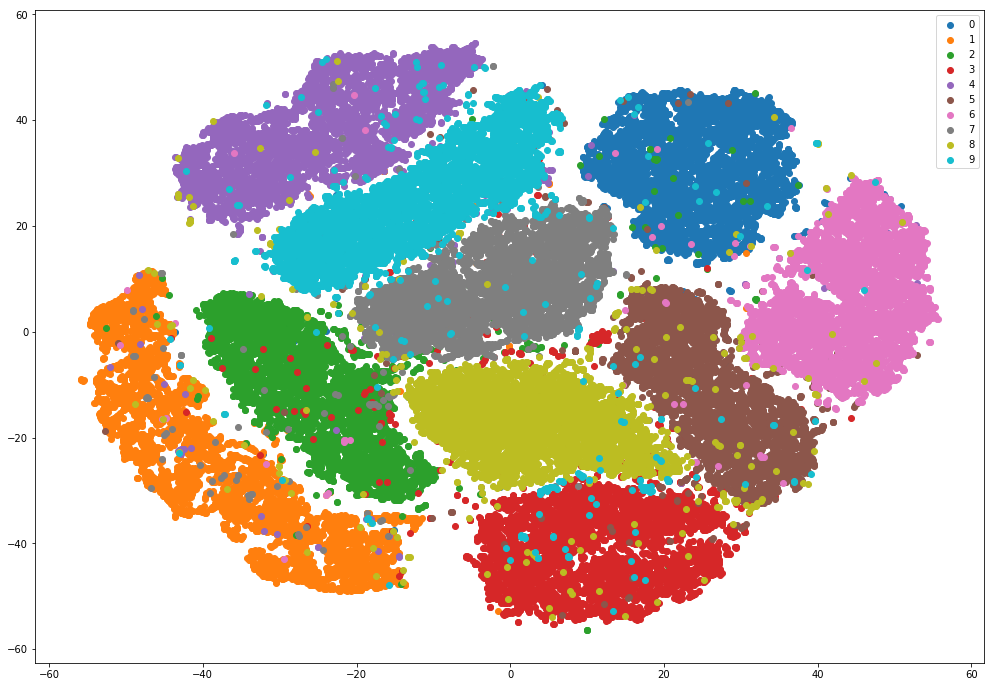

In [28]:
plot_2d(X_train_tsne, y_train, 'tsne-cloud.svg')